## Import necessary libraries

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [26]:
# Load the dataset 

data = pd.read_csv(r"C:\Users\visma\Downloads\archive(1)\healthcare_dataset.csv")
data.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


## Exploratory Data Analysis

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [28]:
data.describe()

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


### 1. Visualize Age Distribution

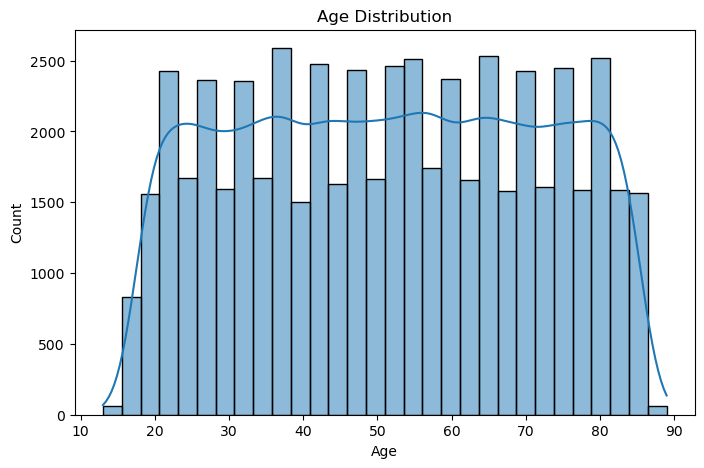

In [29]:
plt.figure(figsize=(8,5))
sns.histplot(data['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

### 2. Billing Amount Distribution

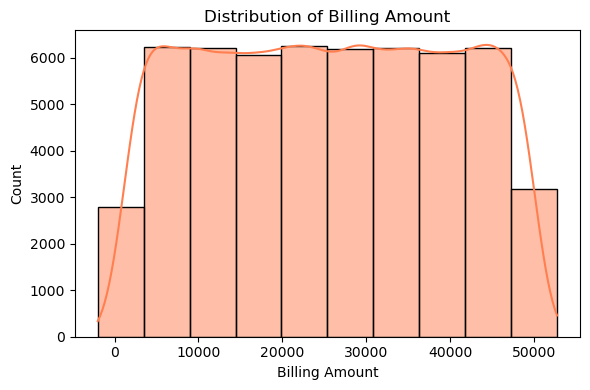

In [30]:
plt.figure(figsize=(6, 4))
sns.histplot(data['Billing Amount'], bins=10, kde=True, color='coral')
plt.title('Distribution of Billing Amount')
plt.xlabel('Billing Amount')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### 3. Gender vs Medical Condition

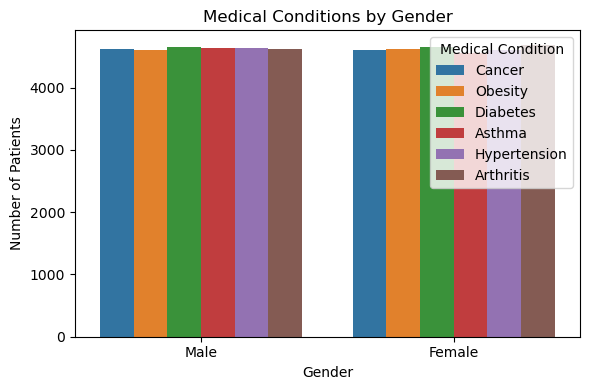

In [31]:
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Gender', hue='Medical Condition')
plt.title('Medical Conditions by Gender')
plt.ylabel('Number of Patients')
plt.tight_layout()
plt.show()

### 4. Test Results by Admission Type

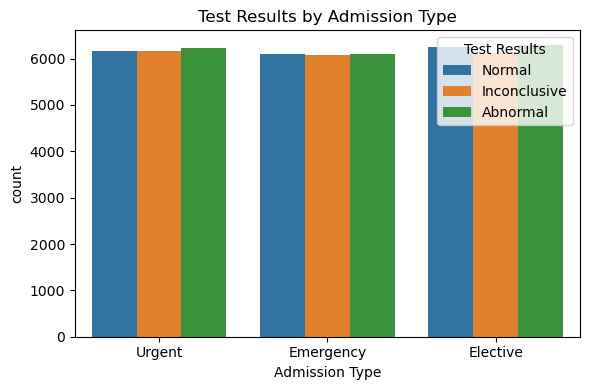

In [32]:
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Admission Type', hue='Test Results')
plt.title('Test Results by Admission Type')
plt.tight_layout()
plt.show()

### 5. Boxplot: Age vs Medical Condition

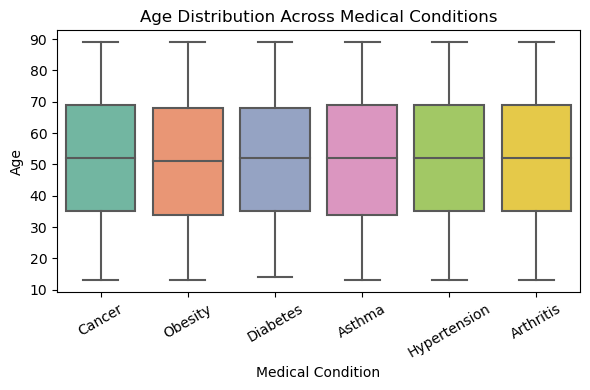

In [33]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=data, x='Medical Condition', y='Age', palette='Set2')
plt.title('Age Distribution Across Medical Conditions')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

### 5. Correlation heatmap on numeric features

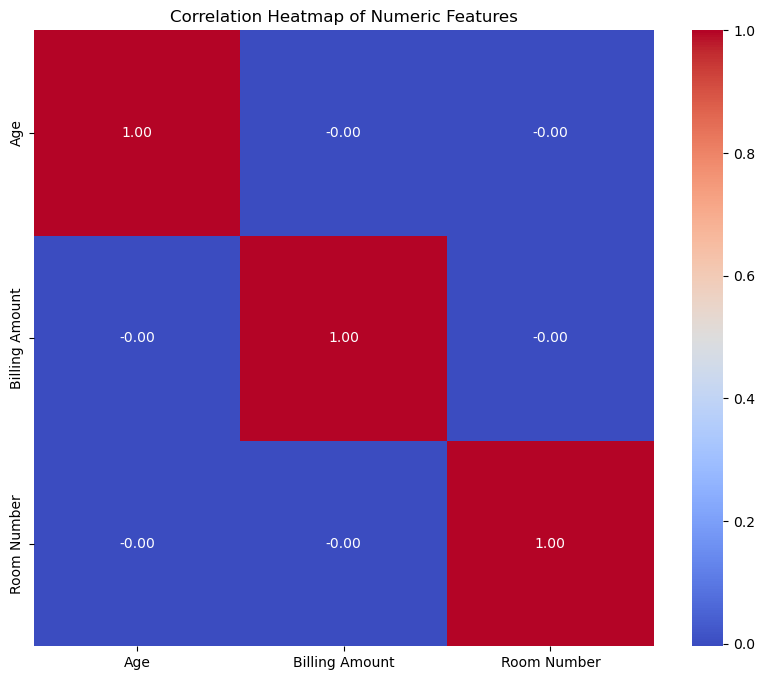

In [34]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10,8))
corr = numeric_data.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

## Data Preprocessing and Feature Engineering

In [35]:
# Example feature engineering: create a health_index feature using Age and Billing Amount
# Note: Adding 1 to Billing Amount to avoid division by zero

data['health_index'] = data['Age'] / (data['Billing Amount'] + 1)

In [36]:
# Define feature columns and label column
# Drop columns unlikely useful for prediction, or those that leak the target (like 'Medication', 'Test Results')

drop_cols = ['Name', 'Date of Admission', 'Discharge Date', 'Doctor', 'Hospital', 'Medication', 'Test Results']
features = data.drop(drop_cols + ['Medical Condition'], axis=1)
labels = data['Medical Condition']  # target variable for classification

In [37]:
# Identify numeric and categorical columns

numeric_features = ['Age', 'Billing Amount', 'Room Number', 'health_index']
categorical_features = ['Gender', 'Blood Type', 'Admission Type', 'Insurance Provider']

In [38]:
# Split data into train, validation, test sets

X_train, X_temp, y_train, y_temp = train_test_split(features, labels, test_size=0.3, random_state=42, stratify=labels)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [39]:
# Pipelines for numeric and categorical processing

numeric_transformer = Pipeline([('scaler', StandardScaler())])

categorical_transformer = Pipeline([('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer([('num', numeric_transformer, numeric_features),('cat', categorical_transformer, categorical_features)])


In [40]:
# Fit the preprocessor on training data and transform datasets

X_train_proc = preprocessor.fit_transform(X_train)
X_val_proc = preprocessor.transform(X_val)
X_test_proc = preprocessor.transform(X_test)

### Feature Importance Plot (Random Forest)

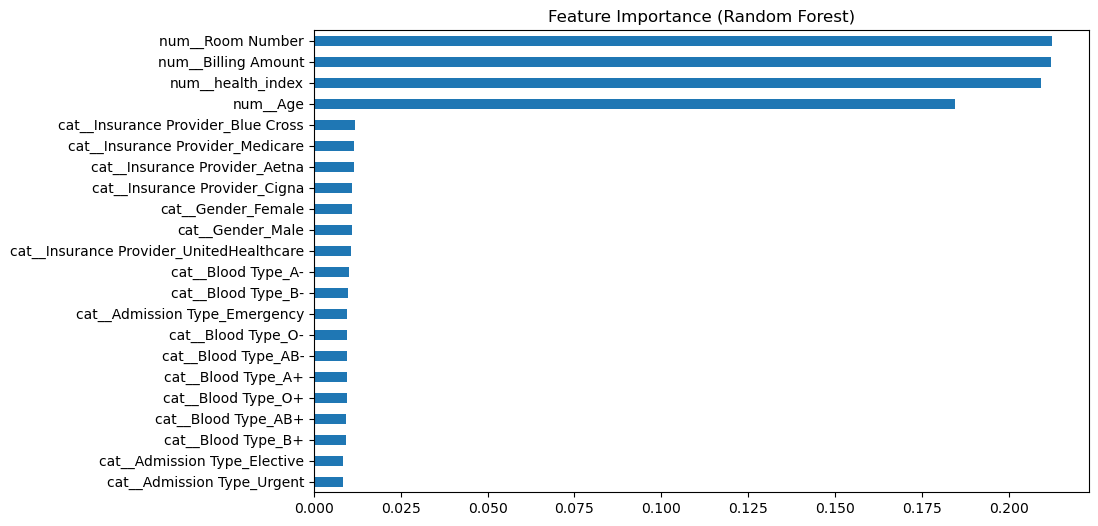

In [41]:
model_rf = Pipeline([('preprocessor', preprocessor), ('classifier', RandomForestClassifier(random_state=42))])
model_rf.fit(X_train, y_train)

feature_names = model_rf.named_steps['preprocessor'].get_feature_names_out()
importances = model_rf.named_steps['classifier'].feature_importances_

feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)
feat_imp.plot(kind='barh', title='Feature Importance (Random Forest)', figsize=(10, 6))
plt.gca().invert_yaxis()
plt.show()

## Model Selection and Training

In [42]:
model = RandomForestClassifier(random_state=42, n_jobs=-1)
model.fit(X_train_proc, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [50]:
import pickle

with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

In [43]:
# Validation prediction
y_val_pred = model.predict(X_val_proc)

## Model Evaluation

In [44]:
acc = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {acc:.4f}')

Validation Accuracy: 0.2705


In [45]:
print("Classification Report on Validation Set:")
print(classification_report(y_val, y_val_pred))

Classification Report on Validation Set:
              precision    recall  f1-score   support

   Arthritis       0.27      0.29      0.27      1396
      Asthma       0.28      0.27      0.27      1378
      Cancer       0.28      0.29      0.29      1384
    Diabetes       0.26      0.26      0.26      1395
Hypertension       0.26      0.26      0.26      1387
     Obesity       0.27      0.26      0.27      1385

    accuracy                           0.27      8325
   macro avg       0.27      0.27      0.27      8325
weighted avg       0.27      0.27      0.27      8325



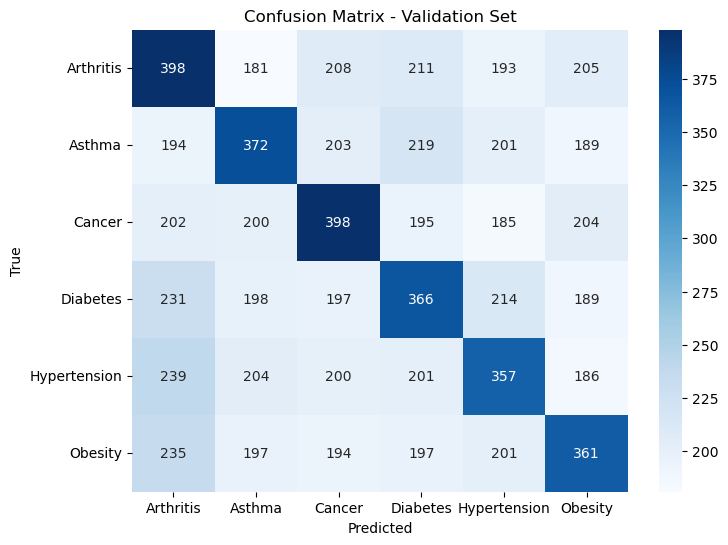

In [48]:
cm = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Validation Set')
plt.show()

## Basic Recommendation System Implementation

In [49]:
def generate_recommendation(patient_features: dict):
    """
    Given patient features as a dictionary, preprocess and predict medical condition.
    Return predicted medical condition as recommendation.

    patient_features keys must correspond to features columns, excluding target and dropped columns.
    """
    import numpy as np
    # Convert input dict to DataFrame
    df = pd.DataFrame([patient_features])
    # Calculate health_index feature
    df['health_index'] = df['Age'] / (df['Billing Amount'] + 1)
    
    # Select only columns used for training (same order assumed)
    df_selected = df[numeric_features + categorical_features]
    
    # Preprocess input features
    X_proc = preprocessor.transform(df_selected)
    
    # Predict medical condition
    prediction = model.predict(X_proc)
    
    return prediction[0]

# Example usage
example_patient = {
    "Age": 45,
    "Billing Amount": 2500.5,
    "Room Number": 101,
    "Gender": "Male",
    "Blood Type": "O",
    "Admission Type": "Emergency",
    "Insurance Provider": "ProviderA"
}
# Generate recommendation for the example patient
recommendation = generate_recommendation(example_patient)
print(f"Predicted Medical Condition Recommendation for example patient: {recommendation}")

Predicted Medical Condition Recommendation for example patient: Diabetes
